#**Decision Trees and Random Forests in Python**

##**Decision Trees and Random Forests Project 1**

###**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline for Jupyter notebook

###**Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/03-Python-for-Data-Analysis-Pandas/kyphosis.csv')
df.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


###**Exploratory data analysis (EDA)**

We'll just check out a simple pairplot for this small dataset.

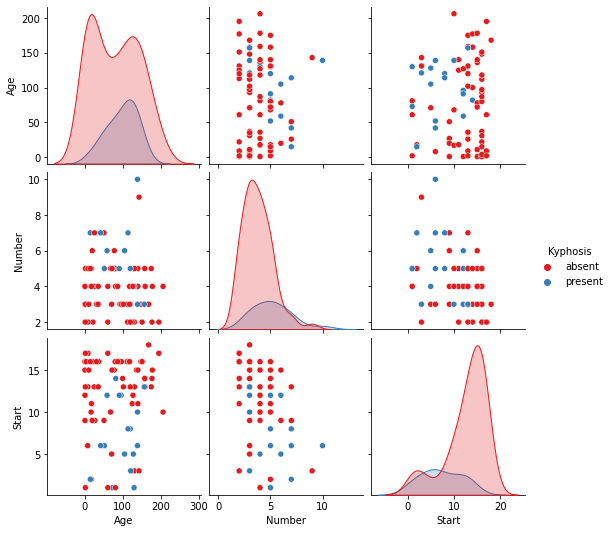

In [5]:
sns.pairplot(df,hue='Kyphosis',palette='Set1');

####**Train Test Split**

Let's split up the data into a training set and a test set!


In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

####**Decision Trees**

We'll start just by training a single decision tree.


In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

####**Prediction and Evaluation**

Let's evaluate our decision tree.


In [8]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[15  6]
 [ 5  1]]

 
 Classification Report:
               precision    recall  f1-score   support

      absent       0.75      0.71      0.73        21
     present       0.14      0.17      0.15         6

    accuracy                           0.59        27
   macro avg       0.45      0.44      0.44        27
weighted avg       0.62      0.59      0.60        27



####**Tree Visualization**

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:


In [9]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

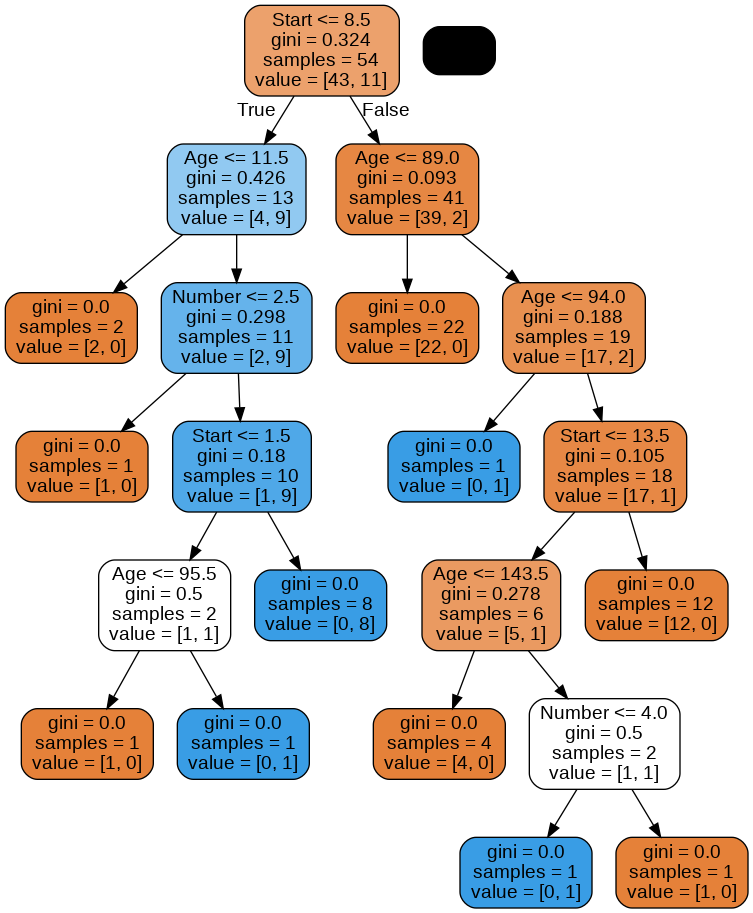

In [10]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

####**Random Forests**

Now let's compare the decision tree model to a random forest.


In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix:' '\n', confusion_matrix(y_test,rfc_pred))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,rfc_pred))

Confusion Matrix:
 [[20  1]
 [ 5  1]]

 
 Classification Report:
               precision    recall  f1-score   support

      absent       0.80      0.95      0.87        21
     present       0.50      0.17      0.25         6

    accuracy                           0.78        27
   macro avg       0.65      0.56      0.56        27
weighted avg       0.73      0.78      0.73        27



##**Random Forest Project 2**

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
  
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

###**Data**

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [12]:
loans = pd.read_csv('/content/drive/MyDrive/03-Python-for-Data-Analysis-Pandas/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [15]:
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

###**Exploratory Data Analysis (EDA)**

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

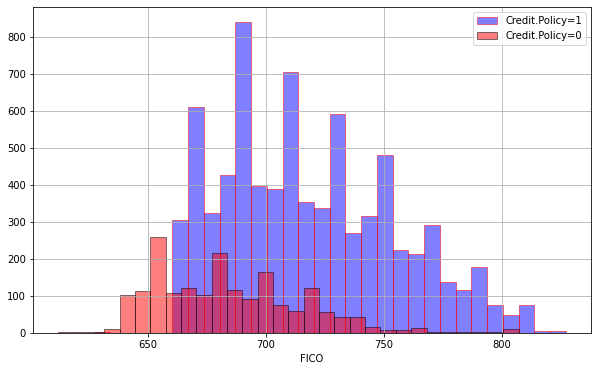

In [16]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue', edgecolor = 'red',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red', edgecolor = 'black',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO');

** Create a similar figure, except this time select by the not.fully.paid column.**

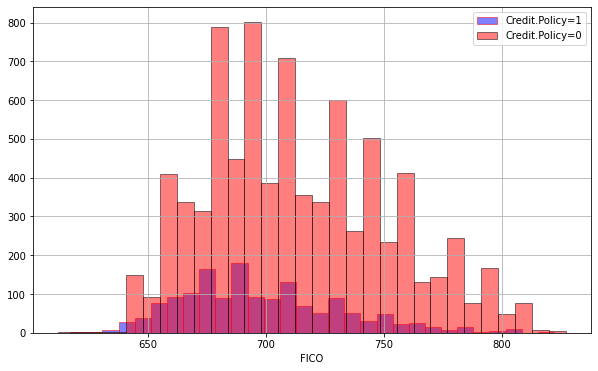

In [17]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue', edgecolor = 'red',
                                              bins=30,label='Credit.Policy=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red', edgecolor = 'black',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO');

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

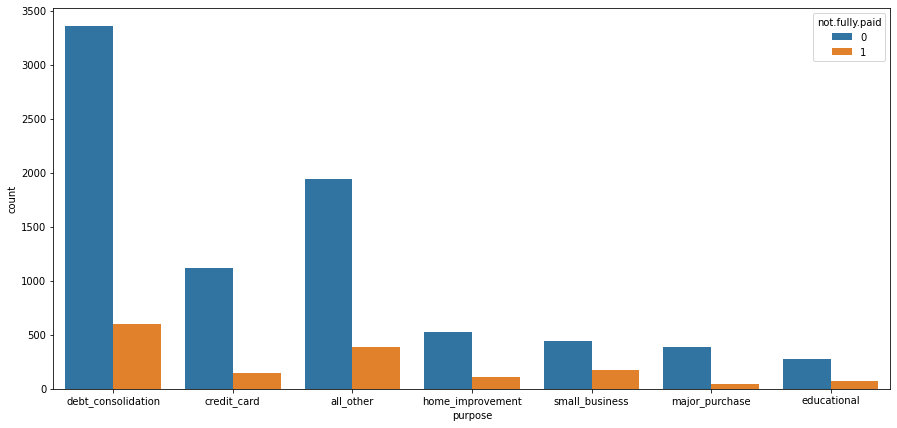

In [18]:
plt.figure(figsize = (15, 7))
sns.countplot(x ='purpose', hue='not.fully.paid', data = loans);

** Let's see the trend between FICO score and interest rate.**

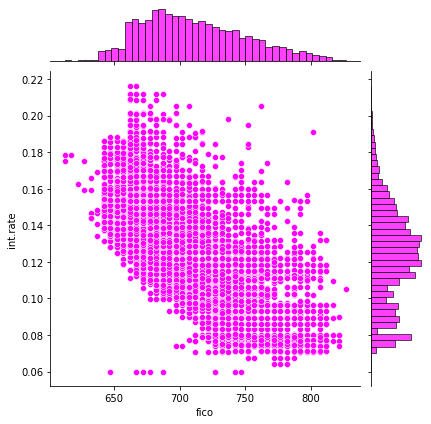

In [19]:
sns.jointplot(x = 'fico', y = 'int.rate', data=loans, color = 'magenta' );

** Create lmplots, separate it into columns to see if the trend differed between not.fully.paid and credit.policy. .**

<Figure size 792x504 with 0 Axes>

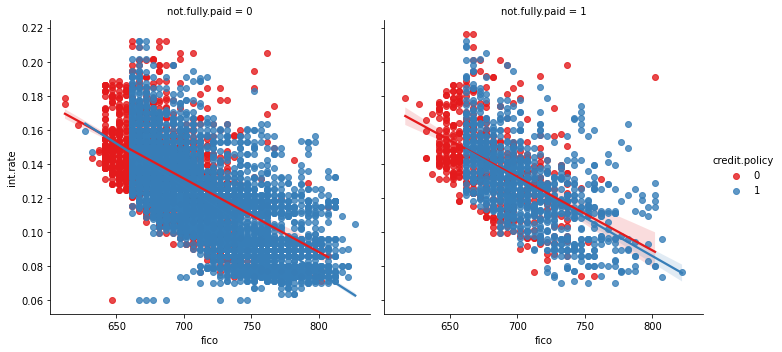

In [20]:
plt.figure(figsize=(11,7)) 
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy', col='not.fully.paid',palette='Set1');

####**Setting up the Data**

Let's get ready to set up our data for our Random Forest Classification Model!

Check loans.info() again.


In [21]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


####**Categorical Features**

Notice that the purpose column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.


In [22]:
cat_feats = ['purpose']

Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.

In [23]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

####**Train Test Split**

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**


In [24]:
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

####**Training a Decision Tree Model**

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

** Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data. **


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

####**Predictions and Evaluation of Decision Tree**

Create predictions from the test set and create a classification report and a confusion matrix.


In [26]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[1998  433]
 [ 341  102]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



####**Training the Random Forest model**

Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

####**Predictions and Evaluation**

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

** Show the Confusion Matrix for the predictions. **

** Then create a classification report from the results. Do you get anything strange or some sort of warning?


In [28]:
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix:' '\n', confusion_matrix(y_test,rfc_pred))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,rfc_pred))

Confusion Matrix:
 [[2415   16]
 [ 435    8]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.33      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.59      0.51      0.47      2874
weighted avg       0.77      0.84      0.78      2874



What performed better the random forest or the decision tree?

 Depends what metric you are trying to optimize for. 

 Notice the recall for each class for the models.
 
 Neither did very well, more feature engineering is needed.